exact (first)  : -0.2885365103444862
exact (second) : -0.1094199060017973
newton (first) : -0.2967347012771934
newton (second): -0.09467574020809968


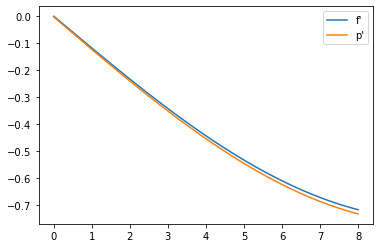

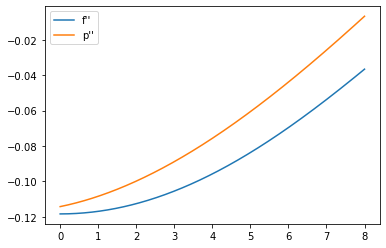

In [3]:
from numdiff import inter_dfdx
import numpy as np
import matplotlib.pyplot as plt


f  = lambda x : 4.8 * np.cos(np.pi * x / 20)
fp = lambda x : -4.8 * np.pi / 20 * np.sin(np.pi * x / 20)
fpp = lambda x : -4.8 * np.pi**2 / 400 * np.cos(np.pi * x / 20)


x_data = np.array([0.15, 2.3, 3.15, 4.85, 6.25, 7.95])
y_data = f(x_data)

print(f'exact (first)  : {fp(2.5)}')
print(f'exact (second) : {fpp(2.5)}')
print(f'newton (first) : {inter_dfdx(y_data, x_data, 2.5)}')
print(f'newton (second): {inter_dfdx(y_data, x_data, 2.5, 2)}')

x = np.linspace(0,8,500)

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()


y_p = fp(x)
y_pp = fpp(x)
p_p = inter_dfdx(y_data, x_data, x)
p_pp = inter_dfdx(y_data, x_data, x, 2)

ax1.plot(x, y_p, label='f\'')
ax1.plot(x, p_p, label='p\'')
ax1.legend()

ax2.plot(x, y_pp, label='f\'\'')
ax2.plot(x, p_pp, label='p\'\'')
ax2.legend()

plt.show()

data = np.column_stack((x, y_p, y_pp, p_p, p_pp))
error_data = np.column_stack((x,np.abs(y_p - p_p), np.abs(y_pp - p_pp)))
# np.savetxt('derivatives.csv', data, header='x,fp,fpp,pp,ppp', comments='', delimiter=',')
# np.savetxt('errors.csv', error_data, header='x,fp,fpp', comments='', delimiter=',')